In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

Генерация цвета

In [2]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

In [3]:
n = 1000

Генерируем всевозможные параметры $\theta$

In [4]:
thetas = np.arange(0, 1.01, 0.01)



fischer_info = $ \frac{n}{\theta \cdot (1 - \theta)}$

rao_kramer $D(\theta^*) >= \frac{1}{I_{x}(\theta)}$

Найдем , чему равна нижняя грань Дисперсии для оценки в нер-ве Рао-Крамера

In [5]:
lower_bound = map(lambda theta : (theta * (1. - theta) / float(n)), thetas)


# Строим график нижней оценки в нер-ве Рао-Крамера он получился симметричным относительно x = 0.5

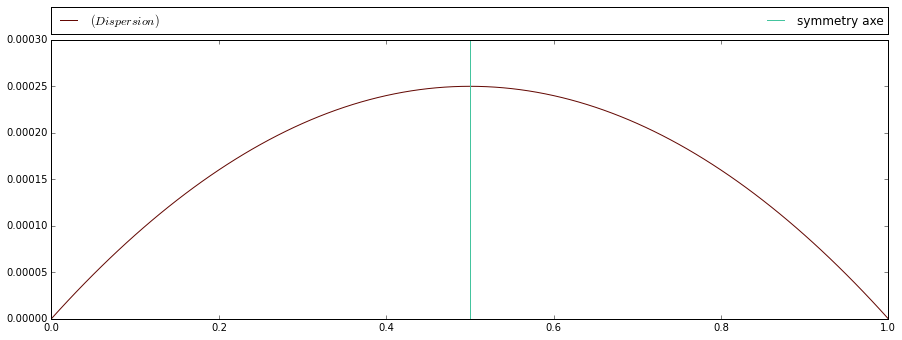

In [25]:
    plt.figure(figsize=(15, 5))
    plt.plot(thetas, lower_bound, color = color_generator(), label = '$(Dispersion)$')
    plt.plot([0.5] * 1000, np.linspace(0, 0.1, 1000), color = color_generator(), label = 'symmetry axe')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(0, 0.0003)
    plt.show()

In [7]:
selections = [scipy.stats.bernoulli.rvs(theta, size = n) for theta in thetas]



Для того, чтобы оценка была эффективной, необходимо равенство в нер-ве Рао-Крамера. Заметим, что выборочное среднее подойдет нам в качестве эффективной оценки

# $\overline X$ is simply the best

In [8]:
eval = map(lambda selec : np.mean(selec), selections)


In [9]:
bootstrap_number = 500

Сгенерируем бутстрепные выборки

In [11]:
bootstrap_selections = []
for j in xrange(len(thetas)) :
    bootstrap_selections.append([scipy.stats.bernoulli.rvs(thetas[j] , size = 1000) for i in xrange(bootstrap_number)])

Найдем оценку (выборочное среднее)

In [12]:
%%time
bootstrap_mean = []
for j in xrange(len(thetas)) :
    bootstrap_mean.append([np.mean(bootstrap_selections[j][i]) for i in xrange(bootstrap_number)])


CPU times: user 583 ms, sys: 13.5 ms, total: 596 ms
Wall time: 626 ms


# А тут подсчитаем бутстрепную оценку дисперсии и построим график нижней оценки и бустрепной оценки

In [16]:
bootstrap_std = [scipy.stats.moment(bootstrap_mean[i], 2) for i in xrange(len(thetas))]


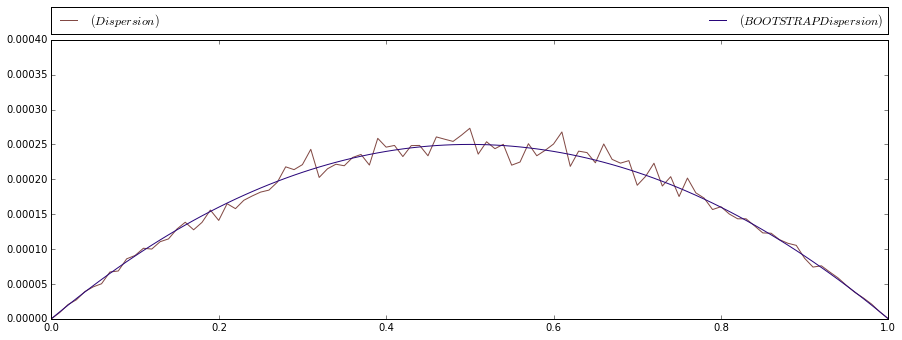

In [22]:
    plt.figure(figsize=(15, 5))
    plt.plot(thetas, bootstrap_std, color = color_generator(), label = '$(Dispersion)$')
    plt.plot(thetas, lower_bound, color = color_generator(), label = '$(BOOTSTRAP Dispersion)$')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(0, 0.0004)
    plt.show()